# Stock Market Prediction using Sentiment Analysis

Step 1: Import Library

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Read data
data = pd.read_csv('Full_Data.csv', encoding = "ISO-8859-1")
data.head(1)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


Step 2: Split into train and test according to date

In [ ]:
# Original Data Sample (5 rows)
original_sample = train.iloc[:, 2:27].head(5)

In [ ]:
train = data[data['Date'] < '20150101']
test = data[data['Date'] > '20141231']

Step 3: Complete preprocessing for training set

In [ ]:
# Removing punctuations
slicedData= train.iloc[:,2:27]
slicedData.replace(to_replace="[^a-zA-Z]", value=" ", regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
slicedData.columns= new_Index
slicedData.head(5)

# Convertng headlines to lower case
for index in new_Index:
    slicedData[index]=slicedData[index].str.lower()
slicedData.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title


In [ ]:
headlines = []
for row in range(0,len(slicedData.index)):
    headlines.append(' '.join(str(x) for x in slicedData.iloc[row,0:25]))

In [ ]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

Step 4: Count Vectorization

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')

In [ ]:
basicvectorizer = CountVectorizer(ngram_range=(1, 1))
basictrain = basicvectorizer.fit_transform(headlines)

In [ ]:
basicvectorizer2 = CountVectorizer(ngram_range=(2, 2))
basictrain2 = basicvectorizer2.fit_transform(headlines)

In [ ]:
basicvectorizer3 = CountVectorizer(ngram_range=(3, 3))
basictrain3 = basicvectorizer3.fit_transform(headlines)

In [ ]:
preprocessed_sample = slicedData.head(5)  # Preprocessed data sample

Step 5: Word Cloud Visulaization

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

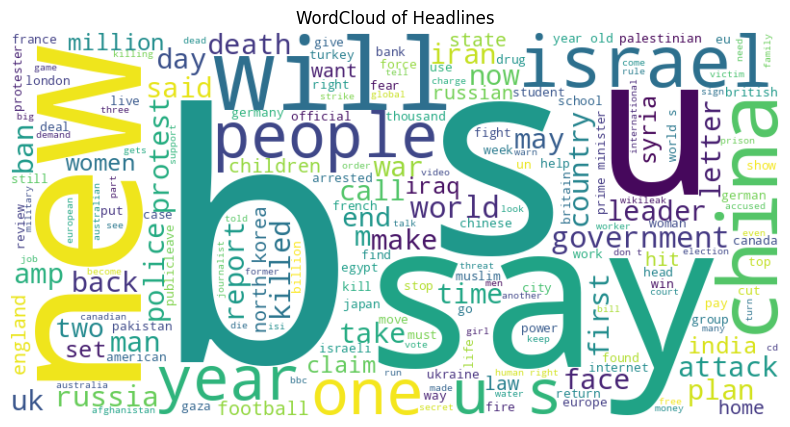

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(headlines))

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Headlines')
plt.show()


Step 6: Unigram Histogram Visulaization

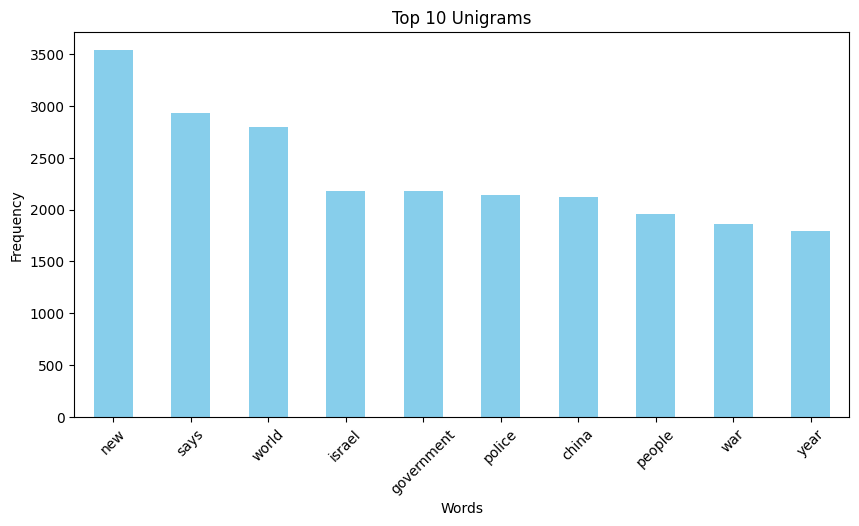

In [ ]:
# Create and visualize the top 10 unigrams 
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words='english')
X = vectorizer.fit_transform(headlines)
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

# Plot top 10 unigrams
plt.figure(figsize=(10, 5))
word_freq.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unigrams')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Step 7: Model 

    -Use Model (inbuilt python) to predict
    -Calculate Evaluation matrix
    -Vectorize
    -Classification report

# **Random Forest**

In [ ]:
basicmodel = RandomForestClassifier(n_estimators=200, criterion='entropy',max_features='sqrt')
basicmodel = basicmodel.fit(basictrain, train["Label"])

In [ ]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,144,42
1,16,176


In [ ]:
print(basictrain.shape)

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions))
print (accuracy_score(test["Label"], predictions))

(3975, 46002)
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       186
           1       0.81      0.92      0.86       192

    accuracy                           0.85       378
   macro avg       0.85      0.85      0.85       378
weighted avg       0.85      0.85      0.85       378

0.8465608465608465


In [ ]:
basicvectorizer2 = CountVectorizer(ngram_range=(2,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)

In [ ]:
basicmodel2 = RandomForestClassifier(n_estimators=200, criterion='entropy',max_features='sqrt')
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])

In [ ]:
basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)

In [ ]:
pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,146,40
1,6,186


In [ ]:
print(basictrain2.shape)

print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))

(3975, 584289)
              precision    recall  f1-score   support

           0       0.96      0.78      0.86       186
           1       0.82      0.97      0.89       192

    accuracy                           0.88       378
   macro avg       0.89      0.88      0.88       378
weighted avg       0.89      0.88      0.88       378

0.8783068783068783


In [ ]:
basicvectorizer3 = CountVectorizer(ngram_range=(3,3))
basictrain3 = basicvectorizer3.fit_transform(headlines)


In [ ]:
basicmodel3 = RandomForestClassifier(n_estimators=200, criterion='entropy',max_features='sqrt')
basicmodel3 = basicmodel3.fit(basictrain3, train["Label"])

In [ ]:
basictest3 = basicvectorizer3.transform(testheadlines)
predictions3 = basicmodel3.predict(basictest3)

In [ ]:
pd.crosstab(test["Label"], predictions3, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,130,56
1,0,192


In [ ]:
print(basictrain3.shape)

print (classification_report(test["Label"], predictions3))
print (accuracy_score(test["Label"], predictions3))

(3975, 969254)
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       186
           1       0.77      1.00      0.87       192

    accuracy                           0.85       378
   macro avg       0.89      0.85      0.85       378
weighted avg       0.89      0.85      0.85       378

0.8518518518518519


# **Logistic Regression**

In [ ]:
basicmodel = LogisticRegression()
basicmodel = basicmodel.fit(basictrain, train["Label"])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))
basictest = basicvectorizer.transform(testheadlines)
predictions = basicmodel.predict(basictest)

In [ ]:
predictions

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [ ]:
pd.crosstab(test["Label"], predictions, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,150,36
1,30,162


In [ ]:
print(basictrain.shape)

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print (classification_report(test["Label"], predictions))
print (accuracy_score(test["Label"], predictions))

(3975, 46002)
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       186
           1       0.82      0.84      0.83       192

    accuracy                           0.83       378
   macro avg       0.83      0.83      0.83       378
weighted avg       0.83      0.83      0.83       378

0.8253968253968254


In [ ]:
basicvectorizer2 = CountVectorizer(ngram_range=(2,2))
basictrain2 = basicvectorizer2.fit_transform(headlines)

In [ ]:
basicmodel2 = LogisticRegression()
basicmodel2 = basicmodel2.fit(basictrain2, train["Label"])

In [ ]:
basictest2 = basicvectorizer2.transform(testheadlines)
predictions2 = basicmodel2.predict(basictest2)

In [ ]:
pd.crosstab(test["Label"], predictions2, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,159,27
1,27,165


In [ ]:
print(basictrain2.shape)

print (classification_report(test["Label"], predictions2))
print (accuracy_score(test["Label"], predictions2))

(3975, 584289)
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       186
           1       0.86      0.86      0.86       192

    accuracy                           0.86       378
   macro avg       0.86      0.86      0.86       378
weighted avg       0.86      0.86      0.86       378

0.8571428571428571


In [ ]:
basicvectorizer3 = CountVectorizer(ngram_range=(3,3))
basictrain3 = basicvectorizer3.fit_transform(headlines)
print(basictrain3.shape)

basicmodel3 = LogisticRegression()
basicmodel3 = basicmodel3.fit(basictrain3, train["Label"])

basictest3 = basicvectorizer3.transform(testheadlines)
predictions3 = basicmodel3.predict(basictest3)

print (classification_report(test["Label"], predictions3))
print (accuracy_score(test["Label"], predictions3))

(3975, 969254)
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.80      0.95      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378

0.8544973544973545


In [ ]:
pd.crosstab(test["Label"], predictions3, rownames=["Actual"], colnames=["Predicted"])

Predicted,0,1
Actual,,
0,141,45
1,10,182


## **Comparision**

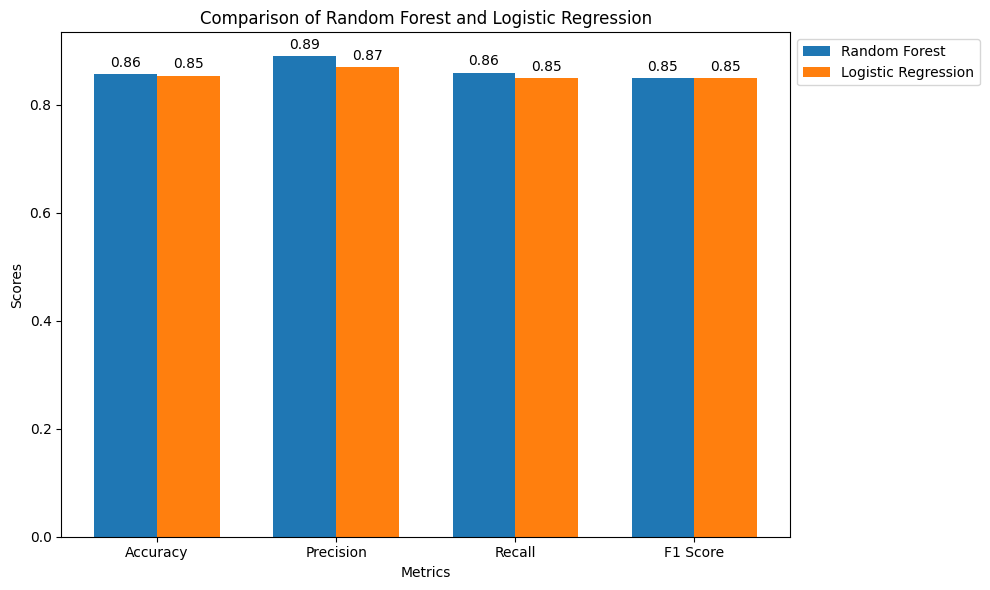

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics 
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Random Forest": [0.8571, 0.89, 0.86, 0.85],
    "Logistic Regression": [0.8545, 0.87, 0.85, 0.85]
}

# Convert to numpy arrays for plotting
labels = metrics["Metric"]
rf_values = metrics["Random Forest"]
lr_values = metrics["Logistic Regression"]

# Setting positions and width for bars
x = np.arange(len(labels))
width = 0.35  

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for Random Forest
bars1 = ax.bar(x - width/2, rf_values, width, label='Random Forest', color='#1f77b4')  # Blue

# Bars for Logistic Regression
bars2 = ax.bar(x + width/2, lr_values, width, label='Logistic Regression', color='#ff7f0e')  # Orange


#Label and legend
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Random Forest and Logistic Regression')
ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adding value labels 
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Adjust layout
plt.tight_layout()
plt.show()


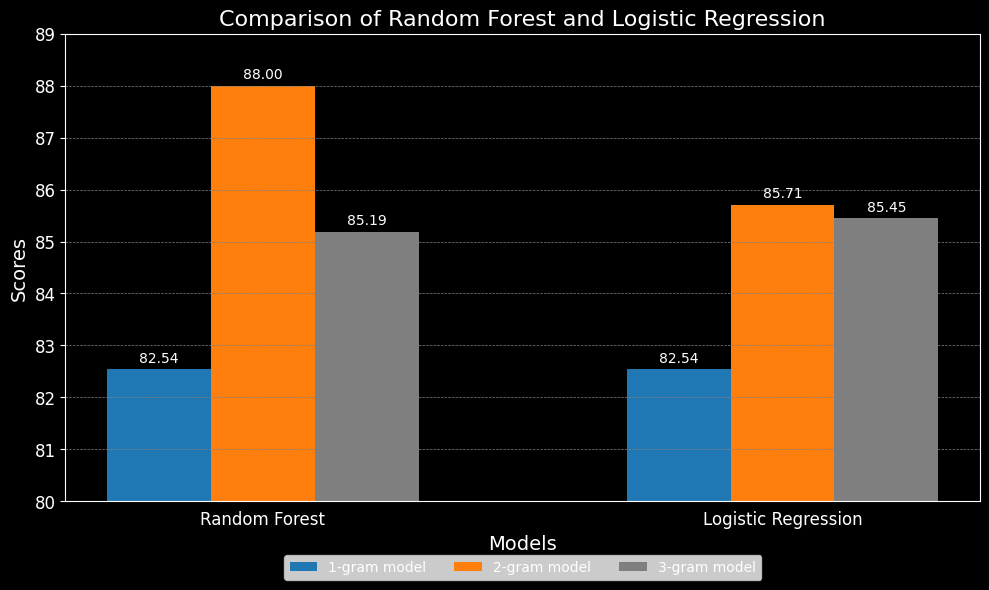

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the actual metrics for Random Forest and Logistic Regression across 1-gram, 2-gram, and 3-gram configurations
models = ["Random Forest", "Logistic Regression"]
n_gram_types = ["1-gram model", "2-gram model", "3-gram model"]
rf_values = [82.54, 88.0, 85.19]  
lr_values = [82.54, 85.71, 85.45]  

# Set bar width and positions
width = 0.2  
x = np.arange(len(models)) 

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('black')  
ax.set_facecolor('black')  

# Plot bars with the desired colors
bars_1gram = ax.bar(x - width, [rf_values[0], lr_values[0]], width, label='1-gram model', color='#1f77b4')  
bars_2gram = ax.bar(x, [rf_values[1], lr_values[1]], width, label='2-gram model', color='#ff7f0e')  
bars_3gram = ax.bar(x + width, [rf_values[2], lr_values[2]], width, label='3-gram model', color='#7f7f7f')  

# Add labels and title 
ax.set_xlabel('Models', color='white', fontsize=14)
ax.set_ylabel('Scores', color='white', fontsize=14)
ax.set_title('Comparison of Random Forest and Logistic Regression', color='white', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, color='white', fontsize=12)
ax.tick_params(axis='y', colors='white', labelsize=12)

# Set Y-axis 
ax.set_ylim(80, 89) 

# Add grid lines
ax.yaxis.grid(True, color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(False)  


ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')


legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)
plt.setp(legend.get_texts(), color='white')

# Add value label
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='white', fontsize=10)

add_labels(bars_1gram)
add_labels(bars_2gram)
add_labels(bars_3gram)

# Adjust layout
plt.tight_layout()
plt.show()
